In [1]:
#| echo: false
#| include: false 
from myfunctions import *
import matplotlib.pyplot as plt
import seaborn as sns
import os
from functools import reduce
myimports

<function myfunctions.myimports()>

# Data Cleaning and Wrangling

In [2]:
sam=pd.read_csv("sam.csv")
sam

,Periodo,Aplicacion,Examen,Tipo_Documento,Documento,Nombre,Numero_Registro,Tipo_Evaluado,SNIES_Programa,Programa,...,NBC,PG,Perc_Global,Perc_NBC,Modulo,PM,Nivel_Desempeño,Perc_Mod,Perc_nbc_mod,Novedades
0,2021,PRO Y TYT 20212,Saber Pro,CC,1140901584,SEBASTIAN NORIEGA MARTINEZ,EK202120012963,Estudiante,1277,INGENIERIA MECANICA,...,INGENIERÍA MECÁNICA Y AFINES,176,88,74,COMPETENCIAS CIUDADANAS,153,2,59,46,NaN
1,2021,PRO Y TYT 20212,Saber Pro,CC,1140901584,SEBASTIAN NORIEGA MARTINEZ,EK202120012963,Estudiante,1277,INGENIERIA MECANICA,...,INGENIERÍA MECÁNICA Y AFINES,176,88,74,COMUNICACIÓN ESCRITA,156,3,68,67,NaN
2,2021,PRO Y TYT 20212,Saber Pro,CC,1140901584,SEBASTIAN NORIEGA MARTINEZ,EK202120012963,Estudiante,1277,INGENIERIA MECANICA,...,INGENIERÍA MECÁNICA Y AFINES,176,88,74,DISEÑO DE SISTEMAS MECÁNICOS,174,3,83,83,NaN
3,2021,PRO Y TYT 20212,Saber Pro,CC,1140901584,SEBASTIAN NORIEGA MARTINEZ,EK202120012963,Estudiante,1277,INGENIERIA MECANICA,...,INGENIERÍA MECÁNICA Y AFINES,176,88,74,INGLÉS,213,B2,97,95,NaN
4,2021,PRO Y TYT 20212,Saber Pro,CC,1140901584,SEBASTIAN NORIEGA MARTINEZ,EK202120012963,Estudiante,1277,INGENIERIA MECANICA,...,INGENIERÍA MECÁNICA Y AFINES,176,88,74,LECTURA CRÍTICA,147,2,53,40,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48500,2022,SABER PRO Y TYT EXTERIOR - 20222,Saber Pro,CC,1003403093,JUAN JAVIER JARABA PARRA,EK202260013466,Estudiante,12075,RELACIONES INTERNACIONALES,...,"CIENCIA POLÍTICA, RELACIONES INTERNACIONALES",176,87,54,COMPETENCIAS CIUDADANAS,201,4,96,75,NaN
48501,2022,SABER PRO Y TYT EXTERIOR - 20222,Saber Pro,CC,1003403093,JUAN JAVIER JARABA PARRA,EK202260013466,Estudiante,12075,RELACIONES INTERNACIONALES,...,"CIENCIA POLÍTICA, RELACIONES INTERNACIONALES",176,87,54,COMUNICACIÓN ESCRITA,150,3,57,28,NaN
48502,2022,SABER PRO Y TYT EXTERIOR - 20222,Saber Pro,CC,1003403093,JUAN JAVIER JARABA PARRA,EK202260013466,Estudiante,12075,RELACIONES INTERNACIONALES,...,"CIENCIA POLÍTICA, RELACIONES INTERNACIONALES",176,87,54,INGLÉS,218,B2,98,92,NaN
48503,2022,SABER PRO Y TYT EXTERIOR - 20222,Saber Pro,CC,1003403093,JUAN JAVIER JARABA PARRA,EK202260013466,Estudiante,12075,RELACIONES INTERNACIONALES,...,"CIENCIA POLÍTICA, RELACIONES INTERNACIONALES",176,87,54,LECTURA CRÍTICA,162,3,62,24,NaN


In [3]:
# Ajusto tipo de variables.
sam[['Periodo','SNIES_Programa','ID_NBC']]=sam[['Periodo','SNIES_Programa','ID_NBC']].astype(str)

#Separo variables categoricas
sam_cat=[]
sam_num=[]
for col in list(sam.columns):
    if sam[col].dtype=='O':
        sam_cat.append(col)
    else:
        sam_num.append(col)
print(sam_cat)
print(sam_num)

['Periodo', 'Aplicacion', 'Examen', 'Tipo_Documento', 'Documento', 'Nombre', 'Numero_Registro', 'Tipo_Evaluado', 'SNIES_Programa', 'Programa', 'Ciudad', 'ID_NBC', 'NBC', 'Modulo', 'Nivel_Desempeño', 'Novedades']
['PG', 'Perc_Global', 'Perc_NBC', 'PM', 'Perc_Mod', 'Perc_nbc_mod']


In [4]:
#Eliminamos los registros que tienen alguna observación o irregularidad con la presentación de la prueba
sam= sam[sam['Novedades'].isnull()]
sam['Novedades'].notnull().sum()
sam.drop('Novedades', axis=1, inplace=True)


C:\Users\fredy\AppData\Local\Temp\ipykernel_8888\4024167424.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [5]:
#Revisamos el tipo de examen para eliminar los que sean diferentes a Saber Pro
sam['Examen'].value_counts()

Examen
Saber Pro    47558
Name: count, dtype: int64

In [6]:
#Ahora revisamos Tipo_Evaluado 
sam['Tipo_Evaluado'].value_counts()

Tipo_Evaluado
Estudiante    47418
Individual      140
Name: count, dtype: int64

In [7]:
# Ahora eliminamos los registros de Tipo_Evaluado = Individual
sam=sam[sam['Tipo_Evaluado'] != 'Individual']
sam.sample(10)

,Periodo,Aplicacion,Examen,Tipo_Documento,Documento,Nombre,Numero_Registro,Tipo_Evaluado,SNIES_Programa,Programa,...,ID_NBC,NBC,PG,Perc_Global,Perc_NBC,Modulo,PM,Nivel_Desempeño,Perc_Mod,Perc_nbc_mod
21467,2021,PRO Y TYT 20212,Saber Pro,CC,1081833764,DANIELA MARIA JARABA SALAZAR,EK202120937375,Estudiante,3269,INGENIERIA ELECTRONICA,...,29,"INGENIERÍA ELECTRÓNICA, TELECOMUNICACIONES Y A...",169,82,71,COMUNICACIÓN ESCRITA,152,3,61,63
5233,2021,PRO Y TYT 20212,Saber Pro,CC,1140902004,GABRIELLA JARAMILLO PARADA,EK202120994079,Estudiante,90329,ARQUITECTURA,...,18,ARQUITECTURA,154,65,59,COMUNICACIÓN ESCRITA,142,2,53,58
30125,2021,PRO Y TYT 20212,Saber Pro,CC,1051677326,CARLOS ENRIQUE EHRHARDT VILLANUEVA,EK202122581858,Estudiante,1277,INGENIERIA MECANICA,...,31,INGENIERÍA MECÁNICA Y AFINES,130,30,15,INGLÉS,131,A2,24,11
20086,2021,PRO Y TYT 20212,Saber Pro,CC,1140900609,JUAN DIEGO ROLDAN SIERRA,EK202120669036,Estudiante,1277,INGENIERIA MECANICA,...,31,INGENIERÍA MECÁNICA Y AFINES,181,91,80,PENSAMIENTO CIENTÍFICO - CIENCIAS FÍSICAS,177,3,81,79
16463,2021,PRO Y TYT 20212,Saber Pro,CC,1083048511,LAURA ARALY ZAPATA PRADA,EK202120032235,Estudiante,1276,INGENIERIA INDUSTRIAL,...,30,INGENIERÍA INDUSTRIAL Y AFINES,185,94,94,DISEÑO DE SISTEMAS PRODUCTIVOS Y LOGÍSTICOS,210,4,98,98
32994,2022,SABER PRO 2022-1,Saber Pro,CC,1010127001,SAMIR ALEJANDRO PEREZ BAZZA,EK202220294025,Estudiante,1274,INGENIERIA DE SISTEMAS Y COMPUTACION,...,27,"INGENIERÍA DE SISTEMAS, TELEMÁTICA Y AFINES",178,91,89,RAZONAMIENTO CUANTITATIVO,186,3,91,84
20177,2021,PRO Y TYT 20212,Saber Pro,CC,1001999933,JUAN DAVID CONRADO PERTUZ,EK202120677161,Estudiante,1274,INGENIERIA DE SISTEMAS Y COMPUTACION,...,27,"INGENIERÍA DE SISTEMAS, TELEMÁTICA Y AFINES",219,100,100,COMPETENCIAS CIUDADANAS,194,3,94,94
45219,2022,SABER PRO 2022-2,Saber Pro,CC,1143171140,DANIEL ENRIQUE MEZA VARELA,EK202251131853,Estudiante,1274,INGENIERIA DE SISTEMAS Y COMPUTACION,...,27,"INGENIERÍA DE SISTEMAS, TELEMÁTICA Y AFINES",154,63,58,RAZONAMIENTO CUANTITATIVO,145,2,50,36
634,2021,PRO Y TYT 20212,Saber Pro,CC,1067968330,LAURA LILIANA OROZCO TAPIA,EK202120154641,Estudiante,104980,GEOLOG¿A,...,36,"GEOLOGÍA, OTROS PROGRAMAS DE CIENCIAS NATURALES",193,97,81,COMPETENCIAS CIUDADANAS,197,3,95,81
17290,2021,PRO Y TYT 20212,Saber Pro,CC,1045756084,MARTHA ISABELLA GUERRERO ESPINOSA,EK202120196907,Estudiante,1272,ADMINISTRACION DE EMPRESAS,...,9,ADMINISTRACIÓN,162,75,85,COMPETENCIAS CIUDADANAS,164,3,71,82


In [8]:
# Del campo programa, buscamos aquellos que no pertenecen a Uninorte y los eliminamos.
sam['Programa'].value_counts()
print('todos pertenecen a la universidad')

todos pertenecen a la universidad


In [9]:
#Seleccionemos ahora los módulos de los componentes genéricos
sam['Modulo'].value_counts()
competencias=[
    "COMPETENCIAS CIUDADANAS",
    "COMUNICACIÓN ESCRITA",
    "INGLÉS",
    "LECTURA CRÍTICA",
    "RAZONAMIENTO CUANTITATIVO"
]

sam=sam[sam['Modulo'].isin(competencias)]

In [10]:
# Nivel de desempeño tiene Nulos.
sam['Nivel_Desempeño'].value_counts()
#sam[sam['Nivel_Desempeño'].isnull()]

Nivel_Desempeño
3     16021
2      5646
4      4368
B2     3789
1      2692
B1     2612
A2      743
A1       79
Name: count, dtype: int64

:::{.callout-important}
Los valores Nulos del campo Nivel de Desempeño corresponden a aquellos en donde el puntaje del modulo es cero (0)
:::

In [11]:
#Elimino registros duplicados, es decir que todas las columnas tengan los mismos valores.
samND = sam.drop_duplicates()
#Ahora reviso cuantas apariciones tiene un estudiante en el dataset, deben tener 5 registros por documento.
conteo_doc=samND['Documento'].value_counts()
conteo_doc

Documento
1234095944    10
1083039156    10
1045744810    10
1001825465     5
1002153246     5
              ..
1143171004     5
1140902757     5
1234097227     5
1192796697     5
1003403093     5
Name: count, Length: 4690, dtype: int64

In [12]:
#Revisemos aquellos casos en los que hay mas de 5 registros por documento
repeated_doc= conteo_doc[conteo_doc>5].index.tolist()

samND[samND['Documento'].isin(repeated_doc) ].sort_values(['Periodo','Documento'])

,Periodo,Aplicacion,Examen,Tipo_Documento,Documento,Nombre,Numero_Registro,Tipo_Evaluado,SNIES_Programa,Programa,...,ID_NBC,NBC,PG,Perc_Global,Perc_NBC,Modulo,PM,Nivel_Desempeño,Perc_Mod,Perc_nbc_mod
14685,2021,PRO Y TYT 20212,Saber Pro,CC,1045744810,LAURA CECILIA NAME CAMARGO,EK202122849586,Estudiante,1271,DERECHO,...,59,DERECHO Y AFINES,42,1,1,COMPETENCIAS CIUDADANAS,0,1,1,1
14686,2021,PRO Y TYT 20212,Saber Pro,CC,1045744810,LAURA CECILIA NAME CAMARGO,EK202122849586,Estudiante,1271,DERECHO,...,59,DERECHO Y AFINES,42,1,1,COMUNICACIÓN ESCRITA,131,2,43,36
14688,2021,PRO Y TYT 20212,Saber Pro,CC,1045744810,LAURA CECILIA NAME CAMARGO,EK202122849586,Estudiante,1271,DERECHO,...,59,DERECHO Y AFINES,42,1,1,INGLÉS,0,A1,1,1
14690,2021,PRO Y TYT 20212,Saber Pro,CC,1045744810,LAURA CECILIA NAME CAMARGO,EK202122849586,Estudiante,1271,DERECHO,...,59,DERECHO Y AFINES,42,1,1,LECTURA CRÍTICA,0,1,1,1
14691,2021,PRO Y TYT 20212,Saber Pro,CC,1045744810,LAURA CECILIA NAME CAMARGO,EK202122849586,Estudiante,1271,DERECHO,...,59,DERECHO Y AFINES,42,1,1,RAZONAMIENTO CUANTITATIVO,77,1,2,2
272,2021,PRO Y TYT 20212,Saber Pro,CC,1083039156,WILLIAM DAVID DE LIMA CORREA,EK202120078279,Estudiante,1273,INGENIERIA CIVIL,...,25,INGENIERÍA CIVIL Y AFINES,57,1,1,COMPETENCIAS CIUDADANAS,0,1,1,1
273,2021,PRO Y TYT 20212,Saber Pro,CC,1083039156,WILLIAM DAVID DE LIMA CORREA,EK202120078279,Estudiante,1273,INGENIERIA CIVIL,...,25,INGENIERÍA CIVIL Y AFINES,57,1,1,COMUNICACIÓN ESCRITA,104,1,13,11
276,2021,PRO Y TYT 20212,Saber Pro,CC,1083039156,WILLIAM DAVID DE LIMA CORREA,EK202120078279,Estudiante,1273,INGENIERIA CIVIL,...,25,INGENIERÍA CIVIL Y AFINES,57,1,1,INGLÉS,0,A1,1,1
277,2021,PRO Y TYT 20212,Saber Pro,CC,1083039156,WILLIAM DAVID DE LIMA CORREA,EK202120078279,Estudiante,1273,INGENIERIA CIVIL,...,25,INGENIERÍA CIVIL Y AFINES,57,1,1,LECTURA CRÍTICA,0,1,1,1
278,2021,PRO Y TYT 20212,Saber Pro,CC,1083039156,WILLIAM DAVID DE LIMA CORREA,EK202120078279,Estudiante,1273,INGENIERIA CIVIL,...,25,INGENIERÍA CIVIL Y AFINES,57,1,1,RAZONAMIENTO CUANTITATIVO,180,3,86,55


:::{.callout-important}
Hay 3 estudiantes que repitieron la prueba en 2022, ya que en 2021 obtuvieron varios modulos en 0 puntos.
Nos quedaremos con el ultimo intento.
:::

In [13]:
#Guardar en una lista los documentos de los estudiantes que repitieron la prueba
#De los estudiantes que repitieron las pruebas Saber Pro, vamos a eliminar la primera prueba (2021).
sam_SET=samND[samND['Documento'].isin(repeated_doc)& (samND['Periodo']=='2021')]
doc_to_del= list(sam_SET['Documento'].unique())
doc_to_del

['1083039156', '1234095944', '1045744810']

In [14]:
sam_ND=samND[(samND['Periodo']!=2021) & (~samND['Documento'].isin(doc_to_del)) ]
sam_ND['Documento'].value_counts().max()

5

:::{.callout-important}
Ya tenemos listo el dataset para pivotearlo
:::

In [15]:
sam['Documento'].nunique() #Debe quedarnos esta cantidad de registros al terminar el pivot.

4690

In [16]:
samND_copy = samND.copy()


In [17]:
samND_copy = samND_copy.drop_duplicates(subset='Documento')
samND_copy.reset_index(inplace=True, drop=True)

In [18]:
samND_copy.sample(5)

,Periodo,Aplicacion,Examen,Tipo_Documento,Documento,Nombre,Numero_Registro,Tipo_Evaluado,SNIES_Programa,Programa,...,ID_NBC,NBC,PG,Perc_Global,Perc_NBC,Modulo,PM,Nivel_Desempeño,Perc_Mod,Perc_nbc_mod
801,2021,PRO Y TYT 20212,Saber Pro,CC,1005337407,MARIANITA ORDOÑEZ RUIZ,EK202120974964,Estudiante,90329,ARQUITECTURA,...,18,ARQUITECTURA,154,64,58,COMPETENCIAS CIUDADANAS,140,2,45,43
4630,2022,SABER PRO Y TYT EXTERIOR - 20222,Saber Pro,CC,1002421537,SHADIA BAYTER GUTIERREZ DE PIÑERES,EK202260005348,Estudiante,1276,INGENIERIA INDUSTRIAL,...,30,INGENIERÍA INDUSTRIAL Y AFINES,145,50,42,COMPETENCIAS CIUDADANAS,137,2,44,41
3901,2022,SABER PRO 2022-2,Saber Pro,CC,1001947146,LUIS ANTONIO CARTAGENA RUIZ,EK202250879916,Estudiante,1273,INGENIERIA CIVIL,...,25,INGENIERÍA CIVIL Y AFINES,149,56,40,COMPETENCIAS CIUDADANAS,164,3,71,65
3845,2022,SABER PRO 2022-2,Saber Pro,CC,1002372248,HECTOR DE JESUS NOVOA DITA,EK202250841007,Estudiante,3269,INGENIERIA ELECTRONICA,...,29,"INGENIERÍA ELECTRÓNICA, TELECOMUNICACIONES Y A...",167,79,66,COMPETENCIAS CIUDADANAS,153,2,60,53
4040,2022,SABER PRO 2022-2,Saber Pro,CC,1001856858,VALERIA LUCIA CORREA MOVILLA,EK202250931618,Estudiante,102003,CONTADURIA PUBLICA,...,12,CONTADURÍA PUBLICA,170,82,94,COMPETENCIAS CIUDADANAS,140,2,47,58


In [19]:
# Pivotear el DataFrame para contar las categorías en cada módulo
pivoted_df = pd.pivot_table(samND, index='Documento', columns='Modulo', values='PM',fill_value='')
pivoted_df


Modulo,COMPETENCIAS CIUDADANAS,COMUNICACIÓN ESCRITA,INGLÉS,LECTURA CRÍTICA,RAZONAMIENTO CUANTITATIVO
Documento,,,,,
1000047889,175.0,168.0,201.0,199.0,172.0
1000076539,182.0,155.0,200.0,185.0,201.0
1000148517,185.0,155.0,211.0,176.0,126.0
1000154230,190.0,170.0,223.0,206.0,179.0
1000185783,211.0,198.0,210.0,206.0,173.0
...,...,...,...,...,...
771779,177.0,153.0,202.0,186.0,178.0
803420,90.0,160.0,152.0,124.0,123.0
8797937,144.0,128.0,214.0,147.0,159.0


In [20]:
sam_new=pd.merge(pivoted_df,samND_copy, on='Documento')
sam_new.drop(['Modulo','PM'],axis=1,inplace=True)
sam_new

,Documento,COMPETENCIAS CIUDADANAS,COMUNICACIÓN ESCRITA,INGLÉS,LECTURA CRÍTICA,RAZONAMIENTO CUANTITATIVO,Periodo,Aplicacion,Examen,Tipo_Documento,...,Programa,Ciudad,ID_NBC,NBC,PG,Perc_Global,Perc_NBC,Nivel_Desempeño,Perc_Mod,Perc_nbc_mod
0,1000047889,175.0,168.0,201.0,199.0,172.0,2022,SABER PRO 2022-2,Saber Pro,CC,...,NEGOCIOS INTERNACIONALES,BARRANQUILLA,9,ADMINISTRACIÓN,183,92,97,3,81,89
1,1000076539,182.0,155.0,200.0,185.0,201.0,2022,SABER PRO 2022-2,Saber Pro,CC,...,MEDICINA,BARRANQUILLA,45,MEDICINA,185,93,78,3,87,67
2,1000148517,185.0,155.0,211.0,176.0,126.0,2021,PRO Y TYT 20212,Saber Pro,CC,...,DISEÑO INDUSTRIAL,BARRANQUILLA,7,DISEÑO,171,84,78,3,89,88
3,1000154230,190.0,170.0,223.0,206.0,179.0,2022,SABER PRO 2022-2,Saber Pro,CC,...,ADMINISTRACION DE EMPRESAS,BARRANQUILLA,9,ADMINISTRACIÓN,194,97,99,3,91,96
4,1000185783,211.0,198.0,210.0,206.0,173.0,2022,SABER PRO 2022-2,Saber Pro,CC,...,COMUNICACION SOCIAL Y PERIODISMO,BARRANQUILLA,57,"COMUNICACIÓN SOCIAL, PERIODISMO Y AFINES",200,98,98,4,99,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4685,771779,177.0,153.0,202.0,186.0,178.0,2021,PRO Y TYT 20212,Saber Pro,CE,...,MEDICINA,BARRANQUILLA,45,MEDICINA,179,90,68,3,83,58
4686,803420,90.0,160.0,152.0,124.0,123.0,2021,SABER PRO Y TYT EXTERIOR - 20213,Saber Pro,CE,...,ARQUITECTURA,BARRANQUILLA,18,ARQUITECTURA,130,29,22,1,7,7
4687,8797937,144.0,128.0,214.0,147.0,159.0,2022,SABER PRO 2022-2,Saber Pro,CC,...,ADMINISTRACION DE EMPRESAS,BARRANQUILLA,9,ADMINISTRACIÓN,158,69,80,2,51,62
4688,96011609578,133.0,173.0,221.0,151.0,190.0,2021,PRO Y TYT 20212,Saber Pro,TI,...,DISEÑO INDUSTRIAL,BARRANQUILLA,7,DISEÑO,174,86,82,2,38,32


### Cargando el historico de matriculados, concatenar columnas comunes
Esto es para poder cruzar y obtener los codigos, promedio y otra info de nuestro interés

In [21]:
directory = '.'
files = [f for f in os.listdir('.') if f.endswith('.csv') and 'matriculados' in f]
dfs = [pd.read_csv(f, sep=';', low_memory=False) for f in files]
len(dfs)

8

In [22]:
for i, df in enumerate(dfs):
    print(f'para df{i}, sus columnas son: \n {df.columns}')
    

para df0, sus columnas son: 
 Index(['Pidm', 'Periodo_Matricula', 'DISCAPACIDAD', 'RETENCION_DB',
       'FECHA_RETENCION_DB', 'RETENCION_DN', 'FECHA_RETENCION_DN', 'ID',
       'Apellido', 'Primer_Nombre', 'Segundo_Nombre', 'Edad', 'Sexo',
       'Tipo_Documento', 'No_Documento', 'Lugar_Expedicion',
       'Fecha_Expedicion', 'CIUDAD_NACIMIENTO', 'DPTO_NACIMIENTO',
       'PAIS_NACIMIENTO', 'PAIS_NACIONALIDAD', 'Telefono_Celular',
       'Telefono_DP', 'estrato', 'TIPO_ESTUDIANTE', 'DESC_TIPO_ESTUDIANTE',
       'Programa', 'Desc_Programa', 'PERIODO_CATALOGO', 'Tasa', 'Nivel',
       'PROGRAMA_ANTERIOR', 'Codigo_Programa_2', 'Programa_2',
       'Nivel_programa_2_code', 'Nivel_programa_2_desc',
       'Escuela_programa_2_code', 'Escuela_programa_2_desc',
       'Estado_académico_sobrepaso', 'DESC_DECISION', 'SNP', 'PUNTAJE_GLOBAL',
       'rango', 'Desc_Bachillerato', 'Ciudad_Bachillerato',
       'Desc_Dpto_Bachillerato', 'Desc_Pais_Bachillerato', 'Codigo_Dane',
       'Codigo_Banner

In [23]:
rename_col(dfs[1],'COD BANNER','ID')

<p style='font-size:18px;'>Ejecutamos una función personalizada para cambiar el nombre de la columna <code>COD BANNER</code> por <code>ID</code> para evitar posibles errores en los procesos posteriores.</p>

In [24]:
common_columns = set(dfs[0].columns)
for df in dfs[1:]:
    common_columns.intersection_update(df.columns)

# Convertir el conjunto a una lista y mostrar las columnas comunes
common_columns = list(common_columns)
print("Columnas comunes:", common_columns)

Columnas comunes: ['Segundo_Nombre', 'Desc_Programa', 'COLEGIO_PUBLICO', 'Edad', 'DESC_UNIVERSIDAD1', 'Telefono_DP', 'No_Documento', 'ID', 'COLEGIO_PRIVADO', 'CREDITOS_GANADOS_TOTALES', 'Desc_Dpto_Bachillerato', 'Apellido', 'SNP', 'Periodo_Matricula', 'Ciudad_Bachillerato', 'DESC_DECISION', 'Puntos_Totales_PG', 'Programa_2', 'PAIS_NACIMIENTO', 'PERIODO_ULT_ESTADO_ACADEMICO', 'PERIODO_CATALOGO', 'CIUDAD_PAIS_UNIVERSIDAD1', 'Desc_Bachillerato', 'Lugar_Expedicion', 'rango', 'PROMEDIO_TRANSFER', 'Nivel', 'PROGRAMA_ANTERIOR', 'Escuela_programa_2_desc', 'PUNTAJE_GLOBAL', 'ATRIBUTOS', 'Promedio_PR', 'PUNTOS_TRANSFER', 'Nivel_programa_2_code', 'Desc_Pais_Bachillerato', 'Escuela_programa_2_code', 'IND_PAGO_01_02', 'Creditos_Totales_Cursados_PR', 'COLEGIO_BILINGUE', 'ULTIMO_ESTADO_ACADEMICO', 'CRED_APROBADOS_TOTALES', 'IND_SOLO_MAT_INGLES', 'CRED_CURSADOS_PROG_TRANSFER', 'Primer_Nombre', 'email', 'estrato', 'Fecha_Expedicion', 'CIUDAD_NACIMIENTO', 'Sexo', 'PAIS_NACIONALIDAD', 'DPTO_NACIMIENTO', 

In [25]:
len(common_columns)

70

In [26]:
dfs_common = [df[common_columns] for df in dfs]
concatenated_df = pd.concat(dfs_common, ignore_index=True)
concatenated_df

,Segundo_Nombre,Desc_Programa,COLEGIO_PUBLICO,Edad,DESC_UNIVERSIDAD1,Telefono_DP,No_Documento,ID,COLEGIO_PRIVADO,CREDITOS_GANADOS_TOTALES,...,CIUDADANIA,Programa,Codigo_Banner,Creditos_Totales_Cursados_PG,ESTADO_ACAD_SOBREPASO,Telefono_Celular,Codigo_Programa_2,Promedio_PG,TIPO_ESTUDIANTE,Codigo_Dane
0,Andres,Contaduría Pública,NaN,31.0,NaN,3509329,1143116504,200012054,Y,70.0,...,C,PRCONTADURIA,42218.0,NaN,NaN,3007260020,NaN,NaN,9,"3,08001E+11"
1,Miguel,Ciencia Política y Gobierno,NaN,33.0,NaN,3990777,1140825678,200014712,Y,135.0,...,C,PCIENPOLIGOB,120394.0,NaN,NaN,3043990777,NaN,NaN,9,"3,08001E+11"
2,Rafael,Ingeniería Industrial,NaN,21.0,NaN,3196608,1001779209,200021778,Y,146.0,...,C,PINGINDUSTRL,3202.0,NaN,NaN,3017903126,NaN,NaN,9,"4,08573E+11"
3,Margarita,Filosofía y Humanidades,NaN,31.0,NaN,3163248011,1140827074,200022740,Y,135.0,...,C,PFILOSOHUMAN,35675.0,NaN,NaN,3163248011,NaN,NaN,9,"3,08001E+11"
4,Del Carmen,Psicología,NaN,53.0,1713-Universidad del Norte,3575688,32605496,32605496,Y,130.0,...,C,PRPSICOLOGIA,3459.0,NaN,NaN,3135622471,NaN,NaN,9,"3,08001E+11"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100903,NaN,Psicología,NaN,17.0,NaN,3871607,1042243347,200185959,Y,NaN,...,C,PRPSICOLOGIA,3186.0,NaN,NaN,3014518711,NaN,NaN,1,"3,08573E+11"
100904,Sofia,Psicología,NaN,19.0,NaN,3034707,1001818978,200191580,Y,NaN,...,C,PRPSICOLOGIA,53363.0,NaN,NaN,3146785825,NaN,NaN,1,"4,47001E+11"
100905,NaN,Psicología,NaN,18.0,NaN,3002092633,1043963166,200184933,Y,NaN,...,C,PRPSICOLOGIA,62455.0,NaN,NaN,3002092633,NaN,NaN,1,"3,13001E+11"
100906,Lisseth,Psicología,NaN,17.0,NaN,3006461753,1043118257,200182845,Y,NaN,...,C,PRPSICOLOGIA,120535.0,NaN,NaN,3006461753,NaN,NaN,1,"3,08758E+11"


### Cruce de información

Vamos a cruzar informacion para obtener datos de promedio y codigo

In [27]:
rename_col(concatenated_df,'No_Documento', 'Documento')

<p style='font-size:18px;'>Ejecutamos una función personalizada para cambiar el nombre de la columna <code>No_Documento</code> por <code>Documento</code> para evitar posibles errores en los procesos posteriores.</p>

In [28]:
sam_new.shape

(4690, 24)

In [29]:
# Identificar y seleccionar el registro con el mayor valor de 'PUNTAJE_GLOBAL' para cada 'Documento'
concatenated_df_unique = concatenated_df.loc[concatenated_df.groupby('Documento')['Periodo_Matricula'].idxmax()]
concatenated_df_unique.shape



(22261, 70)

In [30]:
merged=pd.merge(sam_new,concatenated_df_unique[
    [   'Documento',
        'ID',
        'PUNTAJE_GLOBAL', 
        'Creditos_Totales_Cursados_PR',
        'CRED_APROBADOS_TOTALES',
        'Promedio_PR',
        'Puntos_Totales_PR',
        'Periodo_Matricula'
        ]], on='Documento', how='left')
print(merged.shape)
na_mask = merged['ID'].isna()
merged['ID'].isnull().sum()

(4690, 31)


35

In [31]:
print(merged.shape)
merged.columns

(4690, 31)


Index(['Documento', 'COMPETENCIAS CIUDADANAS', 'COMUNICACIÓN ESCRITA',
       'INGLÉS', 'LECTURA CRÍTICA', 'RAZONAMIENTO CUANTITATIVO', 'Periodo',
       'Aplicacion', 'Examen', 'Tipo_Documento', 'Nombre', 'Numero_Registro',
       'Tipo_Evaluado', 'SNIES_Programa', 'Programa', 'Ciudad', 'ID_NBC',
       'NBC', 'PG', 'Perc_Global', 'Perc_NBC', 'Nivel_Desempeño', 'Perc_Mod',
       'Perc_nbc_mod', 'ID', 'PUNTAJE_GLOBAL', 'Creditos_Totales_Cursados_PR',
       'CRED_APROBADOS_TOTALES', 'Promedio_PR', 'Puntos_Totales_PR',
       'Periodo_Matricula'],
      dtype='object')

In [32]:
merged[['Nombre','Documento']][merged['ID'].isnull()]

,Nombre,Documento
970,GABRIELA URANGO OVIEDO,1002192819
1960,ANDREA VALERIA POSADA PEREZ,1010081310
2140,JUAN JOSE CABARCA CHARRIS,1010146761
2200,CINDY LORAINE VERGARA ZULUAGA,1035753530
2254,CESAR ANDRES SANCHEZ INSIGNARES,1043028647
2315,TATIANA MARGARITA RESTREPO CERVANTES,1045727778
2484,SEBASTIAN FLOREZ MANTILLA,1050977260
2523,MARIA CAMILA FUENTES REYES,1065845458
2621,CAMILA ANDREA MOTTA ROMERO,1083041271
2871,ESTEBAN ANDRES REY MONTERO,1140890750


In [33]:
faltantes=pd.read_csv('faltantes.csv', sep=";")
faltantes

,Nombre,Documento,ID,Tasa,Unnamed: 4
0,GABRIELA URANGO OVIEDO,1002192819,200116269,201730.0,NaN
1,ANDREA VALERIA POSADA PEREZ,1010081310,200048347,201710.0,NaN
2,JUAN JOSE CABARCA CHARRIS,1010146761,200126474,201810.0,NaN
3,CINDY LORAINE VERGARA ZULUAGA,1035753530,200129631,201830.0,NaN
4,CESAR ANDRES SANCHEZ INSIGNARES,1043028647,200095729,201630.0,NaN
5,TATIANA MARGARITA RESTREPO CERVANTES,1045727778,200048757,201610.0,NaN
6,SEBASTIAN FLOREZ MANTILLA,1050977260,200042838,201710.0,NaN
7,MARIA CAMILA FUENTES REYES,1065845458,200090116,201630.0,NaN
8,CAMILA ANDREA MOTTA ROMERO,1083041271,200092002,201630.0,NaN
9,ESTEBAN ANDRES REY MONTERO,1140890750,200064577,201430.0,NaN


In [34]:
# Crear un mapeo de No_documento a ID desde df3
id_mapping = faltantes.set_index('Documento')['ID']

# Actualizar los valores NaN en 'ID' de merged_df usando el mapeo de df3
merged.loc[na_mask, 'ID'] = merged.loc[na_mask, 'Documento'].map(id_mapping)


In [35]:
merged[merged['ID'].isnull()] 

,Documento,COMPETENCIAS CIUDADANAS,COMUNICACIÓN ESCRITA,INGLÉS,LECTURA CRÍTICA,RAZONAMIENTO CUANTITATIVO,Periodo,Aplicacion,Examen,Tipo_Documento,...,Nivel_Desempeño,Perc_Mod,Perc_nbc_mod,ID,PUNTAJE_GLOBAL,Creditos_Totales_Cursados_PR,CRED_APROBADOS_TOTALES,Promedio_PR,Puntos_Totales_PR,Periodo_Matricula


In [36]:
merged.shape

(4690, 31)

In [37]:
rename_col(merged,'PUNTAJE_GLOBAL','SABER11')

<p style='font-size:18px;'>Ejecutamos una función personalizada para cambiar el nombre de la columna <code>PUNTAJE_GLOBAL</code> por <code>SABER11</code> para evitar posibles errores en los procesos posteriores.</p>

In [38]:
notas=pd.read_csv('notas.csv',sep=';',low_memory=False)
notas

,Periodo,Codigo_banner,Pidm,promedio_acumulado,Estado_academico,Codigo_Programa
0,201410,200060024,193328,"3,93",NN,PINGINDUSTRL
1,201410,200060151,193527,"3,33",NN,PINGINDUSTRL
2,201410,200060331,193860,"3,81",NN,PINGINDUSTRL
3,201410,200060007,193309,"3,72",NN,PINGINDUSTRL
4,201410,200060209,193650,"3,9",NN,PINGINDUSTRL
...,...,...,...,...,...,...
268675,202430,200152021,324378,"4,19",-99,PINGINDUSTRL
268676,202430,200152188,324547,"4,32",-99,PINGENICIVIL
268677,202430,200150109,322383,"4,07",-99,PINGINDUSTRL
268678,202430,200148566,320499,"4,32",-99,PINGINDUSTRL


In [39]:
'''notas= notas.pivot(index='Codigo_banner', columns='Periodo', values='promedio_acumulado')
notas'''

"notas= notas.pivot(index='Codigo_banner', columns='Periodo', values='promedio_acumulado')\nnotas"

In [40]:
merged[merged['Periodo']=='2021']

,Documento,COMPETENCIAS CIUDADANAS,COMUNICACIÓN ESCRITA,INGLÉS,LECTURA CRÍTICA,RAZONAMIENTO CUANTITATIVO,Periodo,Aplicacion,Examen,Tipo_Documento,...,Nivel_Desempeño,Perc_Mod,Perc_nbc_mod,ID,SABER11,Creditos_Totales_Cursados_PR,CRED_APROBADOS_TOTALES,Promedio_PR,Puntos_Totales_PR,Periodo_Matricula
2,1000148517,185.0,155.0,211.0,176.0,126.0,2021,PRO Y TYT 20212,Saber Pro,CC,...,3,89,88,200129894.0,346.0,115.0,115.0,4.02,463.4,202210.0
5,1000256763,180.0,166.0,184.0,167.0,131.0,2021,PRO Y TYT 20212,Saber Pro,CC,...,3,86,43,200122918.0,357.0,130.0,130.0,4.41,574.3,202130.0
17,1000578348,193.0,187.0,206.0,180.0,194.0,2021,PRO Y TYT 20212,Saber Pro,CC,...,3,93,79,200108084.0,384.0,231.0,231.0,4.24,981.3,202230.0
19,1000653781,205.0,132.0,175.0,177.0,152.0,2021,PRO Y TYT 20212,Saber Pro,CC,...,4,98,100,200109802.0,347.0,136.0,125.0,3.63,494.6,202230.0
21,1000712835,185.0,168.0,200.0,170.0,150.0,2021,PRO Y TYT 20212,Saber Pro,CC,...,3,89,90,200103174.0,331.0,146.0,146.0,3.88,566.6,202130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4684,761232,177.0,161.0,196.0,149.0,110.0,2021,PRO Y TYT 20212,Saber Pro,CE,...,3,83,58,200128351.0,NaN,NaN,NaN,NaN,NaN,NaN
4685,771779,177.0,153.0,202.0,186.0,178.0,2021,PRO Y TYT 20212,Saber Pro,CE,...,3,83,58,200128350.0,NaN,NaN,NaN,NaN,NaN,NaN
4686,803420,90.0,160.0,152.0,124.0,123.0,2021,SABER PRO Y TYT EXTERIOR - 20213,Saber Pro,CE,...,1,7,7,200138325.0,NaN,105.0,105.0,4.27,449.1,202210.0
4688,96011609578,133.0,173.0,221.0,151.0,190.0,2021,PRO Y TYT 20212,Saber Pro,TI,...,2,38,32,200153987.0,NaN,NaN,NaN,NaN,NaN,NaN


Next Step.

Ahora sí, EDA, GRaficos, ETC. Buscar los promedios de esta población y asistencia a CAE y CREE, alguna vez estuvo en periodo de prueba? ETC?

1. Visualizacion de Datos Nulos

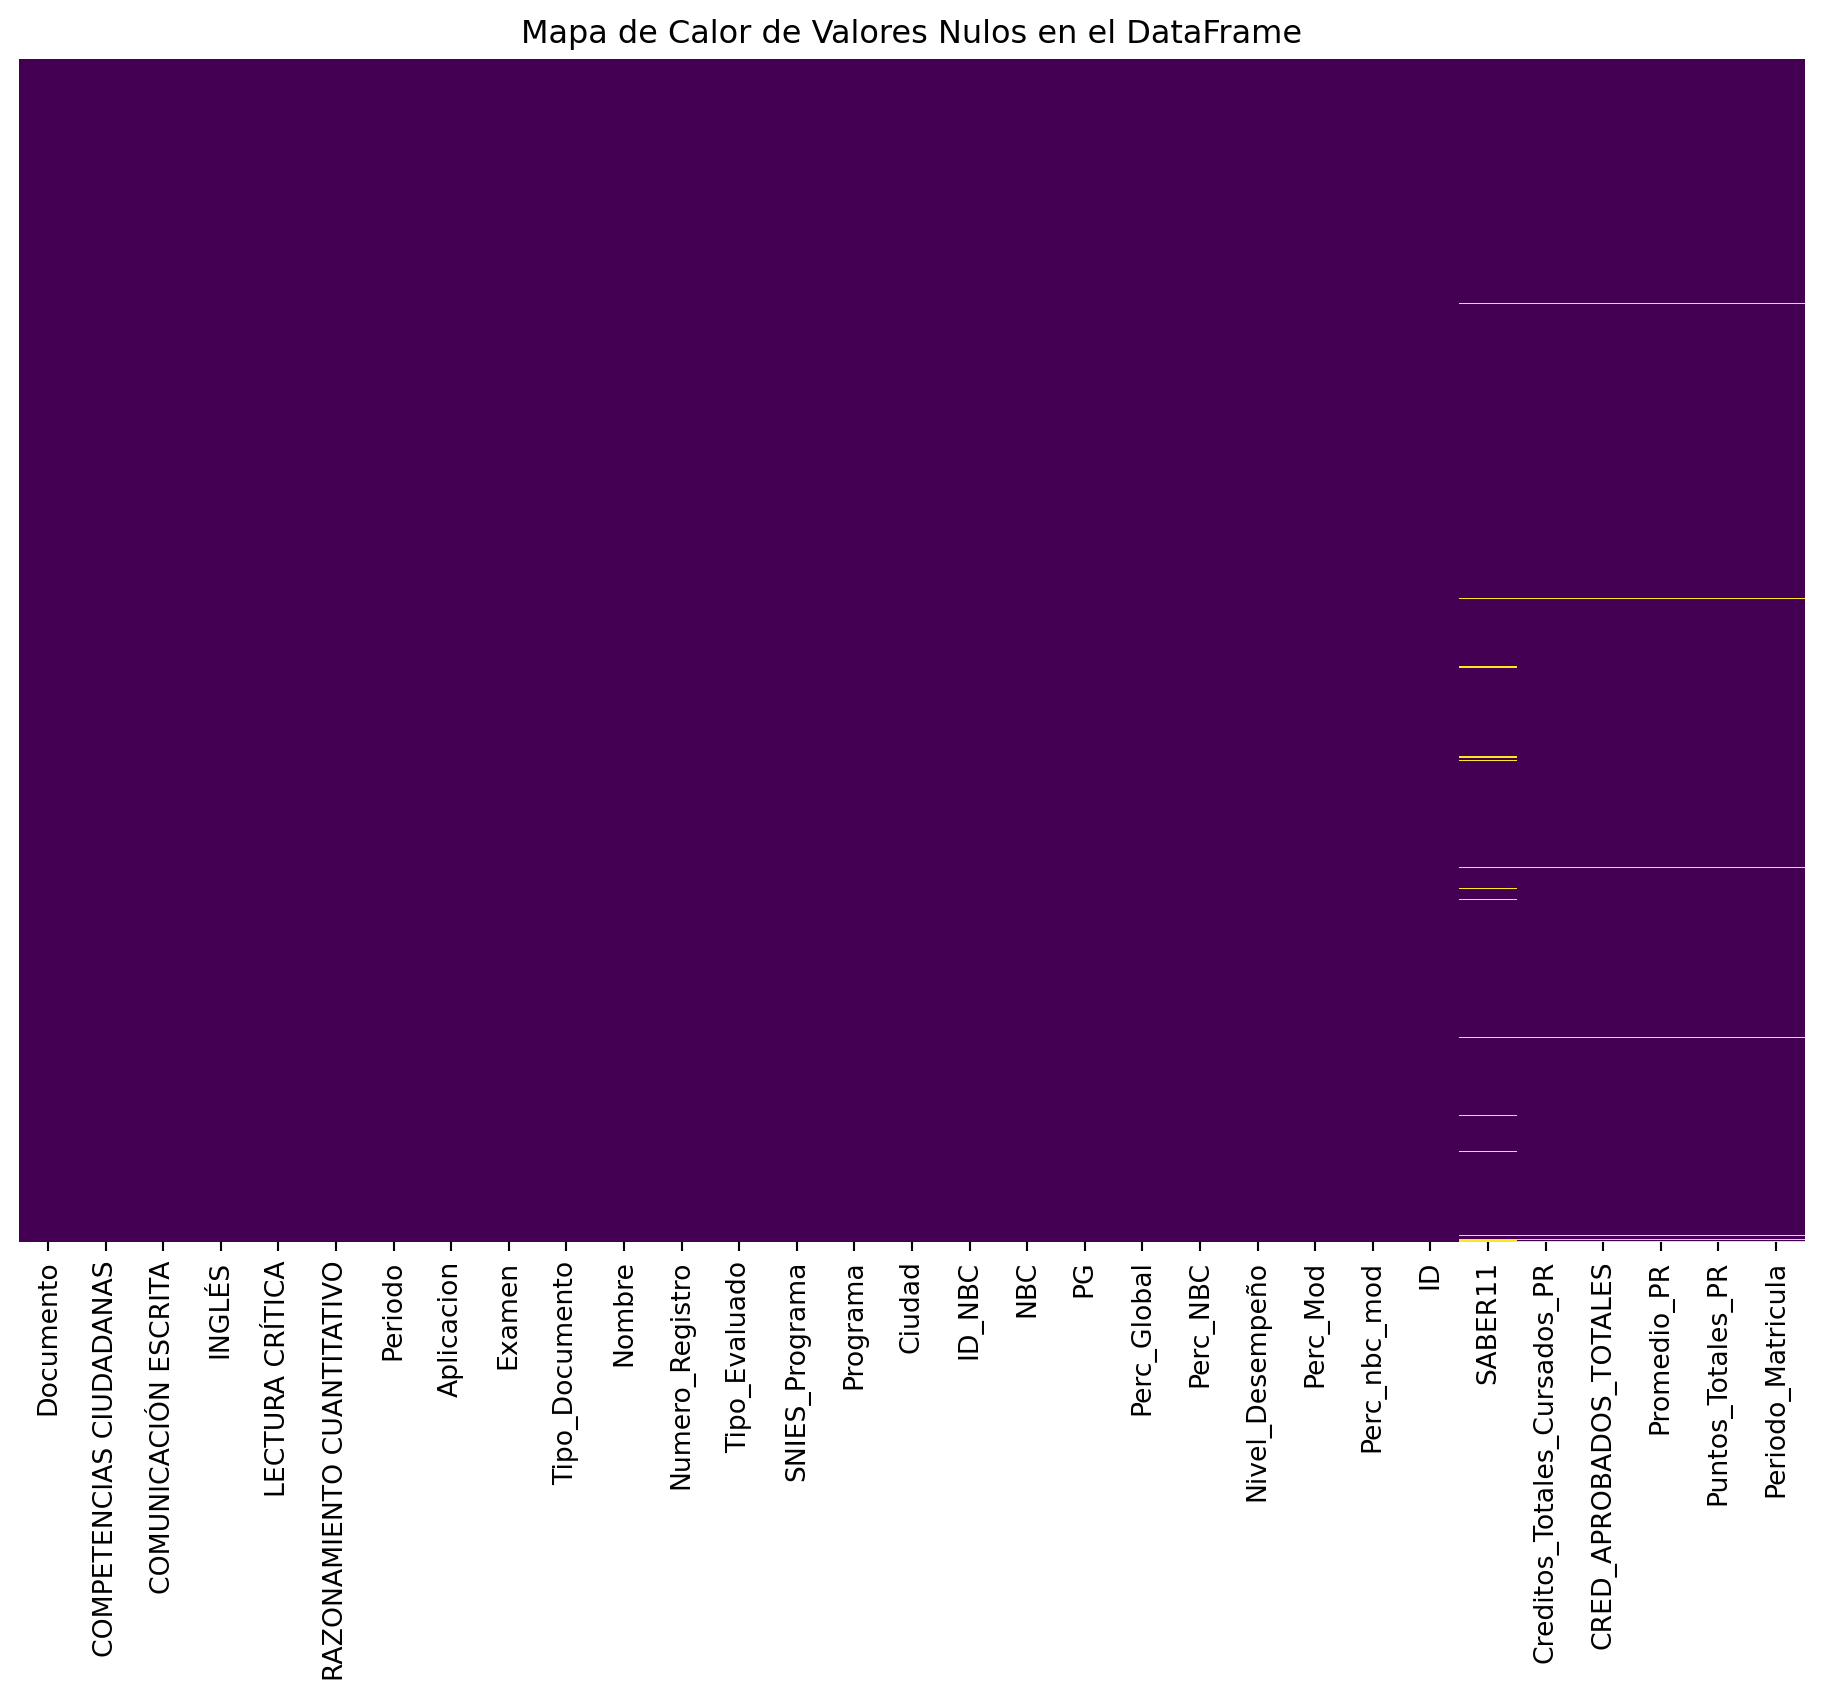

In [41]:
plt.figure(figsize=(12, 8))  # Ajustar el tamaño del gráfico
sns.heatmap(merged.isnull(), cbar=False, cmap='viridis', yticklabels=False)

# Mostrar el gráfico
plt.title('Mapa de Calor de Valores Nulos en el DataFrame')
plt.show()


In [42]:
merged.columns

Index(['Documento', 'COMPETENCIAS CIUDADANAS', 'COMUNICACIÓN ESCRITA',
       'INGLÉS', 'LECTURA CRÍTICA', 'RAZONAMIENTO CUANTITATIVO', 'Periodo',
       'Aplicacion', 'Examen', 'Tipo_Documento', 'Nombre', 'Numero_Registro',
       'Tipo_Evaluado', 'SNIES_Programa', 'Programa', 'Ciudad', 'ID_NBC',
       'NBC', 'PG', 'Perc_Global', 'Perc_NBC', 'Nivel_Desempeño', 'Perc_Mod',
       'Perc_nbc_mod', 'ID', 'SABER11', 'Creditos_Totales_Cursados_PR',
       'CRED_APROBADOS_TOTALES', 'Promedio_PR', 'Puntos_Totales_PR',
       'Periodo_Matricula'],
      dtype='object')

In [43]:
Nulls_Uniques(merged,'SABER11')

<p style='font-size:18px;'>Este campo tiene 75 registros nulos  y  240 valores únicos </p>

<p style='font-size:18px;'>Sus valores únicos son:</p>

,count
SABER11,
350.0,93
353.0,88
348.0,83
358.0,81
352.0,81
...,...
57.0,1
59.0,1
210.0,1


In [44]:
merge_final=merged[~merged['SABER11'].isnull()]
merge_final.reset_index(inplace=True, drop=True)

In [45]:
df=merge_final.copy()


In [46]:
df.to_csv('dataforeda.csv', index=False)

## AHORA SI, PROBEMOS LOS PRIMEROS MODELOS Y EDA